# 1. Functions, libraries and packages

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kaggle

In [134]:
def dataframe_info(df: pd.DataFrame):
    """
    Generate a summary DataFrame containing metadata about the columns of the input DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with the following columns:
            - Column_name: Name of each column.
            - Total records: Total number of records in each column.
            - Missing Values: Number of missing (NaN) values in each column.
            - Data type: Data type of each column.
            - Unique values: Number of unique values in each column.
    """
    df_summary = pd.DataFrame({
        'Column_name': df.columns,
        'Total records': [df[col].size for col in df.columns],
        'Missing Values': [df[col].isna().sum() for col in df.columns],
        'Data type': [df[col].dtype for col in df.columns],
        'Unique values': [df[col].nunique() for col in df.columns]
    })

    return df_summary

# 2. Data import

In [135]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('shubhambathwal/flight-price-prediction', path = './data', unzip = True)

Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction


In [136]:
df = pd.read_csv(r'/data/Clean_Dataset.csv')

In [137]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# 3. EDA

In [138]:
dataframe_info(df)

,Column_name,Total records,Missing Values,Data type,Unique values
0,Unnamed: 0,300153,0,int64,300153
1,airline,300153,0,object,6
2,flight,300153,0,object,1561
3,source_city,300153,0,object,6
4,departure_time,300153,0,object,6
5,stops,300153,0,object,3
6,arrival_time,300153,0,object,6
7,destination_city,300153,0,object,6
8,class,300153,0,object,2
9,duration,300153,0,float64,476


In [139]:
df.airline.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [140]:
df.source_city.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [141]:
df.destination_city.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [142]:
df.departure_time.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [143]:
df.arrival_time.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [144]:
df.stops.value_counts()
# if there are only 2 unique values, we can probably just use a binary encoding, but they are three unique values so we will use ordinal encoding


stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [145]:
# not nan values
# a lot of object values to be converted to categorical
# Overall, the dataset is clean and ready for analysis

In [146]:
df['class'].value_counts()
# Only two unique values, we can probably just use a binary encoding

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [147]:
df.duration.describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

<Axes: xlabel='duration', ylabel='Count'>

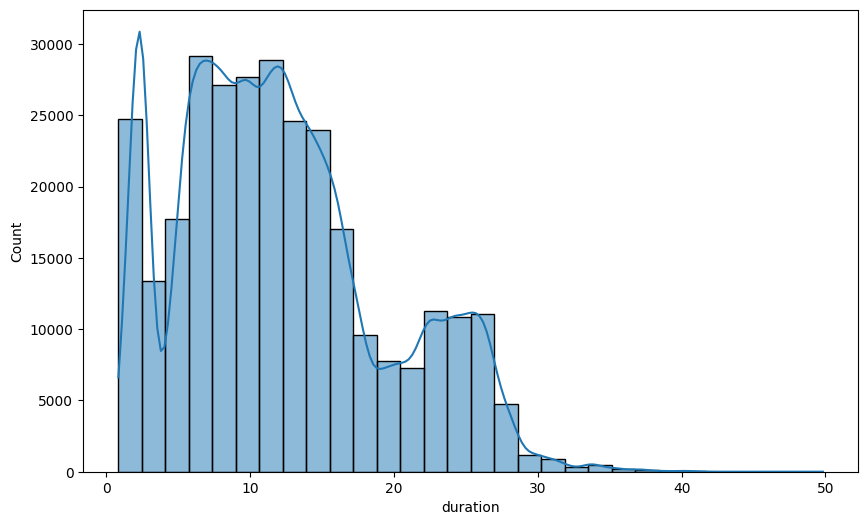

In [148]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True)
# overall not necessary to create a categories (interval) for the duration, we can just use the float values

In [149]:
#df.days_left is not necessary to encode becasue it is already a number

# 4. Preprocesing

In [150]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
df['stops'] = pd.factorize(df['stops'])[0]

In [151]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [152]:
cols_one_hot = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time']

for col in cols_one_hot:
    df[col] = df[col].astype('category')
# Convert categorical columns to category dtype
for col in cols_one_hot:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)
df.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


# 5. Model training

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [154]:
#standart scaler is not nesessary because we are using a tree based model
# but if want to use it, we can use the following code
# num_cols = ['duration', 'days_left']

# scaler = StandardScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])

In [155]:
X,y = df.drop('price', axis=1), df['price']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [157]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(192097, 34) (192097,)
(48025, 34) (48025,)
(60031, 34) (60031,)


In [158]:
reg_model = RandomForestRegressor(n_jobs=-1, random_state=42)
reg_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [159]:
predictions_val = reg_model.predict(X_val)

In [160]:
mae = mean_absolute_error(y_val, predictions_val)
mse = mean_squared_error(y_val, predictions_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, predictions_val)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

MAE: 1104.89
MSE: 7587241.21
RMSE: 2754.49
R^2: 0.99


Text(0.5, 1.0, 'True vs Predicted Values')

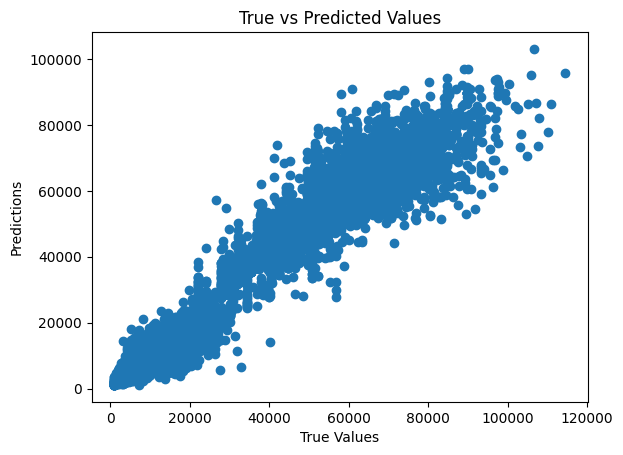

In [161]:
plt.scatter(y_val, predictions_val)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')

In [162]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

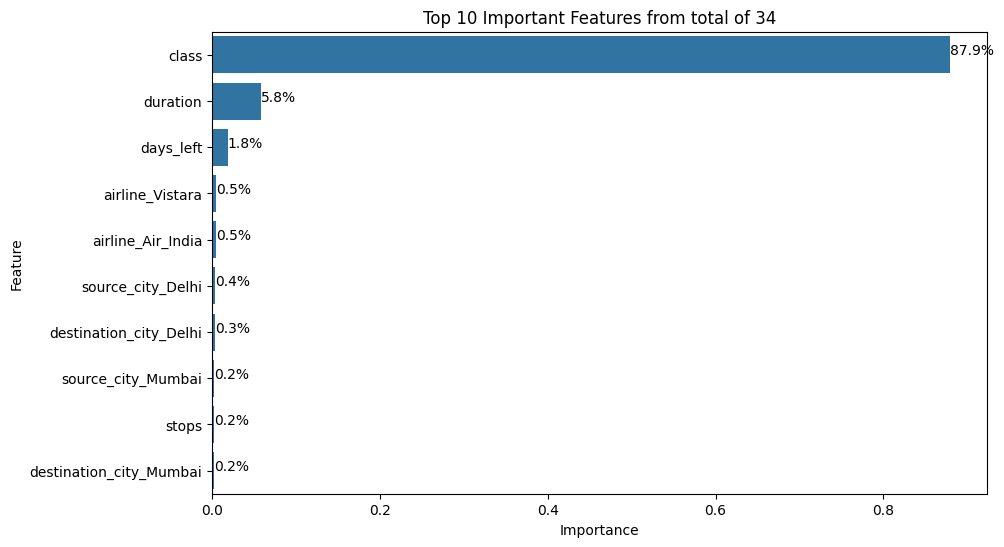

In [163]:
# sorting of most important features
importances = reg_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
plt.figure(figsize=(10, 6))
importances_df = importances_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))

# data labels
for index, value in enumerate(importances_df['Importance'].head(10)):
    plt.text(value, index, f'{value*100:.1f}%')

plt.title(f'Top 10 Important Features from total of {len(importances_df)}')
plt.show()

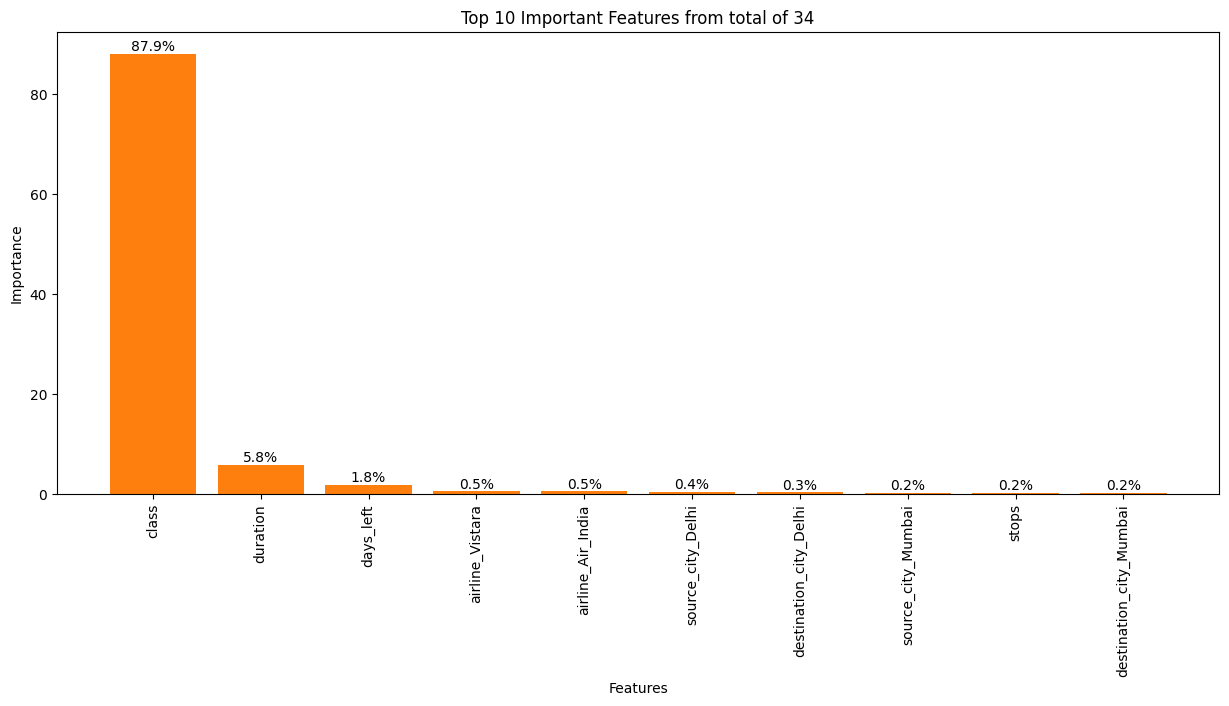

In [164]:
plt.figure(figsize=(15, 6))
plt.bar( x = importances_df['Feature'].head(10), height = importances_df['Importance'].head(10))
plt.xticks(rotation=90)
plt.title(f'Top 10 Important Features from total of {len(importances_df)}')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar_label(plt.bar( x = importances_df['Feature'].head(10), height = importances_df['Importance'].head(10)*100), fmt='%.1f%%')
plt.show()


# 6. HyperParameter tuning

## 6.1 GridSearch

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
X_combined = np.concatenate((X_train, X_val), axis=0)
y_combined = np.concatenate((y_train, y_val), axis=0)

In [167]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], # none means no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] 
}
    

In [168]:
#grid_search = GridSearchCV(estimator=reg_model, param_grid=param_grid, cv=5,verbose=2,n_jobs=-1)
#grid_search.fit(X_combined, y_combined)
#best_params = grid_search.best_params_

#it will take a while to run, so we will use random search

## 6.2 Random Search

### 6.2.1 Without Kfold

In [169]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [170]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [171]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], # none means no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] 
}
    

In [172]:
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_grid, 
    n_iter=2, 
    cv=3,
    verbose=2, 
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42)


In [173]:
random_search.fit(X_combined, y_combined)
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
print("Best parameters found: ", best_params)
print("Best estimator found: ", best_estimator)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}
Best estimator found:  RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=300, n_jobs=-1,
                      random_state=42)


## 6.3 Optuna

In [174]:
!pip3 install optuna

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [175]:
import optuna
import plotly

In [176]:
def objective(trial):
    parameters = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 301),
        'max_depth': trial.suggest_categorical('max_depth', [None, 10, 20, 30]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    }

    model = RandomForestRegressor(**parameters, n_jobs=-1, random_state=42,verbose=1)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    mse = mean_squared_error(y_val, predictions)
    return mse

In [177]:

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10,n_jobs=-1)
print(study.best_params)

[I 2025-05-20 20:09:35,003] A new study created in memory with name: no-name-6cfd87f1-e37e-44ca-9c8f-5a7ec432fca4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  34 tasks     

{'n_estimators': 246, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [178]:

study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_max_depth,params_max_features,params_min_samples_leaf,params_min_samples_split,params_n_estimators,state
0,0,3.805233e+07,2025-05-20 20:09:35.019998,2025-05-20 20:11:57.890278,0 days 00:02:22.870280,10.0,sqrt,2,2,226,COMPLETE
1,1,8.314448e+06,2025-05-20 20:09:35.026737,2025-05-20 20:12:11.083388,0 days 00:02:36.056651,30.0,log2,2,10,184,COMPLETE
2,2,3.513852e+07,2025-05-20 20:09:35.038949,2025-05-20 20:10:51.024485,0 days 00:01:15.985536,10.0,sqrt,3,9,142,COMPLETE
3,3,7.962580e+06,2025-05-20 20:09:35.046941,2025-05-20 20:13:03.008386,0 days 00:03:27.961445,NaN,log2,1,3,295,COMPLETE
4,4,9.823498e+06,2025-05-20 20:09:35.054588,2025-05-20 20:12:06.694505,0 days 00:02:31.639917,20.0,sqrt,2,3,146,COMPLETE
5,5,7.862895e+06,2025-05-20 20:09:35.063865,2025-05-20 20:12:51.146188,0 days 00:03:16.082323,30.0,log2,1,9,246,COMPLETE
6,6,3.603495e+07,2025-05-20 20:09:35.282536,2025-05-20 20:10:58.736678,0 days 00:01:23.454142,10.0,log2,2,7,145,COMPLETE
7,7,3.552718e+07,2025-05-20 20:09:35.302165,2025-05-20 20:11:35.320035,0 days 00:02:00.017870,10.0,log2,2,10,221,COMPLETE
8,8,9.049097e+06,2025-05-20 20:10:51.486163,2025-05-20 20:12:54.145697,0 days 00:02:02.659534,30.0,log2,4,10,190,COMPLETE
9,9,9.784929e+06,2025-05-20 20:10:59.526361,2025-05-20 20:12:38.423052,0 days 00:01:38.896691,20.0,log2,2,2,104,COMPLETE


In [179]:
optuna.visualization.plot_optimization_history(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
              'y': [38052328.77823203, 8314448.035071862, 35138518.67919567,
                    7962580.01843499, 9823497.939970087, 7862895.4806489935,
                    36034949.4166026, 35527181.916030996, 9049096.76554281,
                    9784928.845631886]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
              'y': [38052328.77823203, 8314448.035071862, 8314448.035071862,
                    7962580.01843499, 7962580.01843499, 7862895.4806489935,
                    7862895.4806489935, 7862895.4806489935, 7862895.4806489935,
                    7862895.4806489935]},
             {'marker': {'color': '#cccccc'},
              'mode': 'markers',
              'name': 'Infeasible Trial',
              'showlegend': False,
              'type': 'scatter',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Optimization History Plot'},
               'xaxis': {'title': {'text': 'Trial'}},
               'yaxis': {'title': {'text': 'Objective Value'}}}
})

In [180]:
optuna.visualization.plot_parallel_coordinate(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'dimensions': [{'label': 'Objective Value',
                              'range': [7862895.4806489935, 38052328.77823203],
                              'values': [38052328.77823203, 8314448.035071862,
                                         35138518.67919567, 7962580.01843499,
                                         9823497.939970087, 7862895.4806489935,
                                         36034949.4166026, 35527181.916030996,
                                         9049096.76554281, 9784928.845631886]},
                             {'label': 'max_depth',
                              'range': [0, 3],
                              'ticktext': [10, 30, None, 20],
                              'tickvals': [0, 1, 2, 3],
                              'values': [0, 1, 0, 2, 3, 1, 0, 0, 1, 3]},
                             {'label': 'max_features',
                              'range': [0, 1],
                              'ticktext': [sqrt, log2],
                              'tickvals': [0, 1],
                              'values': [0, 1, 0, 1, 0, 1, 1, 1, 1, 1]},
                             {'label': 'min_samples_leaf', 'range': [1, 4], 'values': [2, 2, 3, 1, 2, 1, 2, 2, 4, 2]},
                             {'label': 'min_samples_split', 'range': [2, 10], 'values': [2, 10, 9, 3, 3, 9, 7, 10, 10, 2]},
                             {'label': 'n_estimators',
                              'range': [104, 295],
                              'values': [226, 184, 142, 295, 146, 246, 145, 221,
                                         190, 104]}],
              'labelangle': 30,
              'labelside': 'bottom',
              'line': {'color': [38052328.77823203, 8314448.035071862,
                                 35138518.67919567, 7962580.01843499,
                                 9823497.939970087, 7862895.4806489935,
                                 36034949.4166026, 35527181.916030996,
                                 9049096.76554281, 9784928.845631886],
                       'colorbar': {'title': {'text': 'Objective Value'}},
                       'colorscale': [[0.0, 'rgb(247,251,255)'], [0.125,
                                      'rgb(222,235,247)'], [0.25,
                                      'rgb(198,219,239)'], [0.375,
                                      'rgb(158,202,225)'], [0.5,
                                      'rgb(107,174,214)'], [0.625,
                                      'rgb(66,146,198)'], [0.75,
                                      'rgb(33,113,181)'], [0.875, 'rgb(8,81,156)'],
                                      [1.0, 'rgb(8,48,107)']],
                       'reversescale': True,
                       'showscale': True},
              'type': 'parcoords'}],
    'layout': {'template': '...', 'title': {'text': 'Parallel Coordinate Plot'}}
})

In [181]:
optuna.visualization.plot_param_importances(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'cliponaxis': False,
              'hovertemplate': [min_samples_split (IntDistribution):
                                0.00039026943478885244<extra></extra>,
                                min_samples_leaf (IntDistribution):
                                0.0039587599358707915<extra></extra>, max_features
                                (CategoricalDistribution):
                                0.015795912558776107<extra></extra>, n_estimators
                                (IntDistribution):
                                0.04391700319094264<extra></extra>, max_depth
                                (CategoricalDistribution):
                                0.9359380548796217<extra></extra>],
              'name': 'Objective Value',
              'orientation': 'h',
              'text': [<0.01, <0.01, 0.02, 0.04, 0.94],
              'textposition': 'outside',
              'type': 'bar',
              'x': [0.00039026943478885244, 0.0039587599358707915,
                    0.015795912558776107, 0.04391700319094264, 0.9359380548796217],
              'y': [min_samples_split, min_samples_leaf, max_features,
                    n_estimators, max_depth]}],
    'layout': {'template': '...',
               'title': {'text': 'Hyperparameter Importances'},
               'xaxis': {'title': {'text': 'Hyperparameter Importance'}},
               'yaxis': {'title': {'text': 'Hyperparameter'}}}
})

In [182]:
study.best_params

{'n_estimators': 246,
 'max_depth': 30,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_features': 'log2'}

In [183]:
final_model = RandomForestRegressor(**study.best_params,n_jobs=-1, random_state=42)

In [184]:
X_test = X_test.to_numpy()

In [185]:
final_model.fit(X_combined, y_combined)
prediction_final = final_model.predict(X_test)

In [186]:
mae = mean_absolute_error(y_test, prediction_final)
mse = mean_squared_error(y_test, prediction_final)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction_final)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

MAE: 1319.25
MSE: 7771381.78
RMSE: 2787.72
R^2: 0.98


Text(0.5, 1.0, 'True vs Predicted Values')

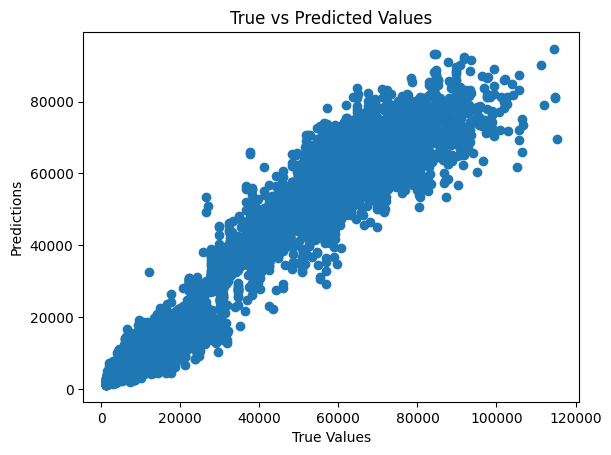

In [187]:
plt.scatter(y_test, prediction_final)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')

In [188]:
importances_final = reg_model.feature_importances_
importances_final_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

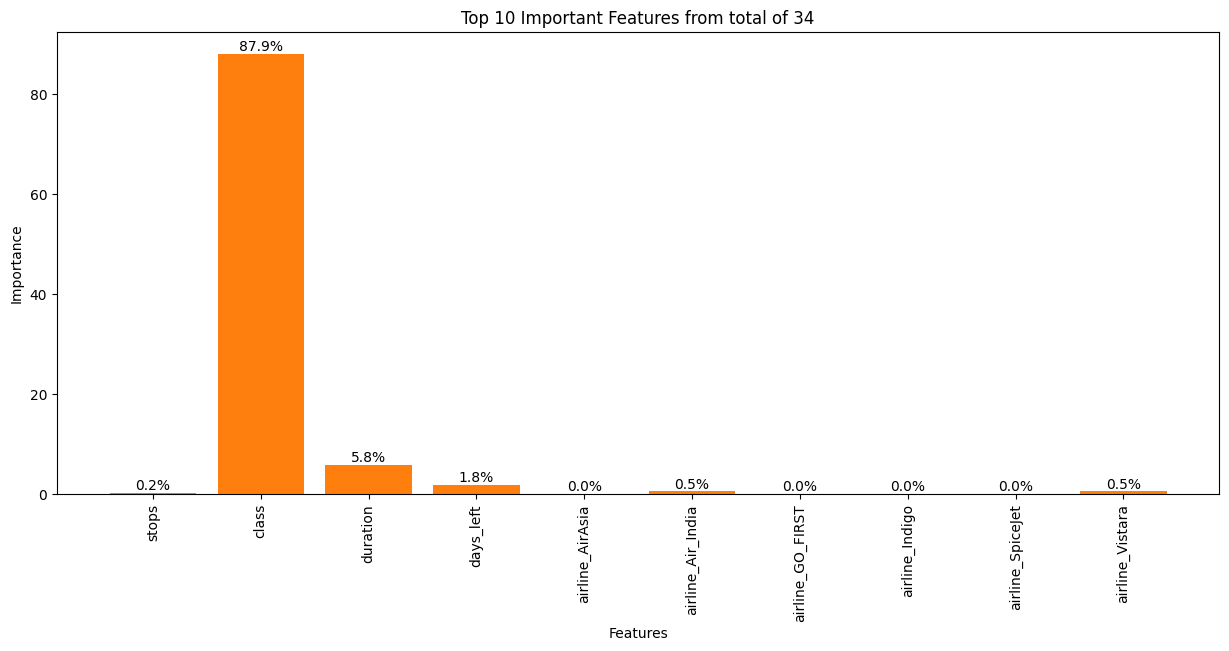

In [189]:
plt.figure(figsize=(15, 6))
plt.bar( x = importances_final_df['Feature'].head(10), height = importances_final_df['Importance'].head(10))
plt.xticks(rotation=90)
plt.title(f'Top 10 Important Features from total of {len(importances_final_df)}')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar_label(plt.bar( x = importances_final_df['Feature'].head(10), height = importances_final_df['Importance'].head(10)*100), fmt='%.1f%%')
plt.show()

# 7. Evalution

In [190]:
# Randomforestregreesion with default
# MAE: 1104.89
# MSE: 7587241.21
# RMSE: 2754.49
# R^2: 0.99

In [ ]:
# Random forrest from optuna
# MAE: 1319.25
# MSE: 7771381.78
# RMSE: 2787.72
# R^2: 0.98